In [1]:
import numpy as np
import pandas as pd
import yfinance
import pandas_ta as ta

# Data
- Open
- High
- Low
- Close
- Volume
- nonCurrentAssetsTotal
- totalLiab
- netDebt,
- totalAssets,
- intangibleAssets

In [2]:
ticker = 'MSFT'
start = '2004-01-02'
end = {
    'AAPL': '2021-09-21',
    'MSFT': '2020-09-29',
    'AMZN': '2020-09-29',
    'SPY': "2023-02-20"
}
def get_yfdata(yf_ticker, cols):
    yf_data = yfinance.download(yf_ticker, start = start, end=end[ticker])
    yf_data = yf_data.rename(columns={'Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})
    yf_data.drop(columns=['Adj Close'])
    print(yf_ticker, yf_data.shape)
    return yf_data[cols]

In [3]:
# * Tech
df = get_yfdata(ticker, ['open', 'high', 'low', 'close','volume'])

[*********************100%***********************]  1 of 1 completed
MSFT (4214, 6)


In [4]:
df0 = pd.read_csv("data/raw/compiled_balance_sheet_data.csv")
df1 = pd.read_csv("data/raw/compiled_cash_flow_data.csv")
df2 = pd.read_csv("data/raw/compiled_income_statement_data.csv")

C:\Users\saxen\AppData\Local\Temp\ipykernel_16460\2915973316.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv("data/raw/compiled_balance_sheet_data.csv")


In [5]:
df0 = df0.iloc[:,1:]
df1 = df1.iloc[:,4:]
df2 = df2.iloc[:,4:]
df_X = pd.concat([df0,df1, df2], axis=1)
# df_X = pd.read_csv("restructured_fundamental_data/fundamental_pca.csv")
df_X

,ticker,time,currency_symbol,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
0,AAPL,2021-09-21T16:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
1,AAPL,2021-09-21T15:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
2,AAPL,2021-09-21T14:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
3,AAPL,2021-09-21T13:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
4,AAPL,2021-09-21T12:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579228,ZTS,2013-02-01T14:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579229,ZTS,2013-02-01T13:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579230,ZTS,2013-02-01T12:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579231,ZTS,2013-02-01T11:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0


In [6]:
df_f = df_X.copy()

In [7]:
fund_features = ['ticker','time','nonCurrentAssetsTotal','totalLiab','netDebt','totalAssets','intangibleAssets']
add_df = df_X.groupby(['ticker']).get_group(ticker.upper()).sort_values('time').reset_index(drop=True).iloc[1:,:]
add_df = add_df[fund_features]
add_df['time'] = add_df['time'].str[:10]
add_df = add_df.groupby(['time']).first().sort_values('time').reset_index()

In [8]:
add_df.index = pd.to_datetime(add_df.time)
add_df = add_df.drop(columns=['time','ticker'])

In [9]:
fund_features = fund_features[2:]
print(fund_features)

['nonCurrentAssetsTotal', 'totalLiab', 'netDebt', 'totalAssets', 'intangibleAssets']


In [10]:
add_df

,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets
time,,,,,
2004-01-02,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09
2004-01-05,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09
2004-01-06,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09
2004-01-07,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09
2004-01-08,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09
...,...,...,...,...,...
2020-09-23,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09
2020-09-24,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09
2020-09-25,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09


In [11]:

df = df.join(add_df, how='outer')
df.iloc[1000:]

,open,high,low,close,volume,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets
2007-12-21,35.900002,36.060001,35.750000,36.060001,83240500.0,2.979200e+10,3.351000e+10,-6.637000e+09,6.564500e+10,1.718000e+09
2007-12-24,36.130001,36.720001,36.049999,36.580002,29622600.0,2.979200e+10,3.351000e+10,-6.637000e+09,6.564500e+10,1.718000e+09
2007-12-26,36.410000,36.639999,36.259998,36.610001,30252400.0,2.979200e+10,3.351000e+10,-6.637000e+09,6.564500e+10,1.718000e+09
2007-12-27,36.349998,36.549999,35.939999,35.970001,33311100.0,2.979200e+10,3.351000e+10,-6.637000e+09,6.564500e+10,1.718000e+09
2007-12-28,36.099998,36.230000,35.669998,36.119999,33447200.0,2.979200e+10,3.351000e+10,-6.637000e+09,6.564500e+10,1.718000e+09
...,...,...,...,...,...,...,...,...,...,...
2020-09-23,207.899994,208.100006,200.029999,200.589996,30803800.0,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09
2020-09-24,199.850006,205.570007,199.199997,203.190002,31202500.0,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09
2020-09-25,203.550003,209.039993,202.539993,207.820007,29437300.0,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09
2020-09-28,210.880005,212.570007,208.059998,209.440002,32004900.0,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09


In [12]:
df.isna().sum()

open                     1
high                     1
low                      1
close                    1
volume                   1
nonCurrentAssetsTotal    1
totalLiab                1
netDebt                  1
totalAssets              1
intangibleAssets         1
dtype: int64

In [13]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'nonCurrentAssetsTotal',
       'totalLiab', 'netDebt', 'totalAssets', 'intangibleAssets'],
      dtype='object')

In [14]:
# preprocessing
df['!close_pct'] = df['close'].pct_change()
df['!open'] = df['open']
df['!close'] = df['close']
df['!high'] = df['high']
df['!low'] = df['low']
from scipy.stats.mstats import gmean
for col in df.columns:
    if '!' not in col and col not in fund_features:
        df[col] = df[col].pct_change()
        df[col] = df[col].apply(lambda x: x+1).rolling(window=5, min_periods=1).apply(gmean).apply(lambda x: x-1)
df = df.dropna()
print(df.shape)
df.head()

(4208, 15)


,open,high,low,close,volume,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2004-01-09,0.003242,0.002080,0.001895,0.001525,0.085602,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.017756,28.030001,27.660000,28.059999,27.590000
2004-01-12,-0.000433,-0.003214,-0.002684,-0.004084,-0.036724,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.003254,27.670000,27.570000,27.730000,27.350000
2004-01-13,-0.004582,-0.004568,-0.005839,-0.005804,0.018889,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.005078,27.549999,27.430000,27.639999,27.260000
2004-01-14,-0.004658,-0.004131,-0.003886,-0.003642,-0.041594,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,0.009843,27.520000,27.700001,27.730000,27.469999
2004-01-15,-0.005989,-0.005395,-0.004178,-0.004443,-0.001045,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.005776,27.549999,27.540001,27.719999,27.420000


In [15]:
df.tail()

,open,high,low,close,volume,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2020-09-22,-0.003245,-0.001607,-0.004732,-0.001306,0.089599,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.024094,205.059998,207.419998,208.100006,202.080002
2020-09-23,-0.002596,-0.002433,-0.004547,-0.004389,0.031898,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,-0.032928,207.899994,200.589996,208.100006,200.029999
2020-09-24,-0.000200,0.001211,-0.000761,0.000276,-0.017091,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.012962,199.850006,203.190002,205.570007,199.199997
2020-09-25,0.000739,0.005238,0.006330,0.007308,-0.118237,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.022787,203.550003,207.820007,209.039993,202.539993
2020-09-28,0.013515,0.009544,0.011622,0.006722,-0.042850,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.007795,210.880005,209.440002,212.570007,208.059998


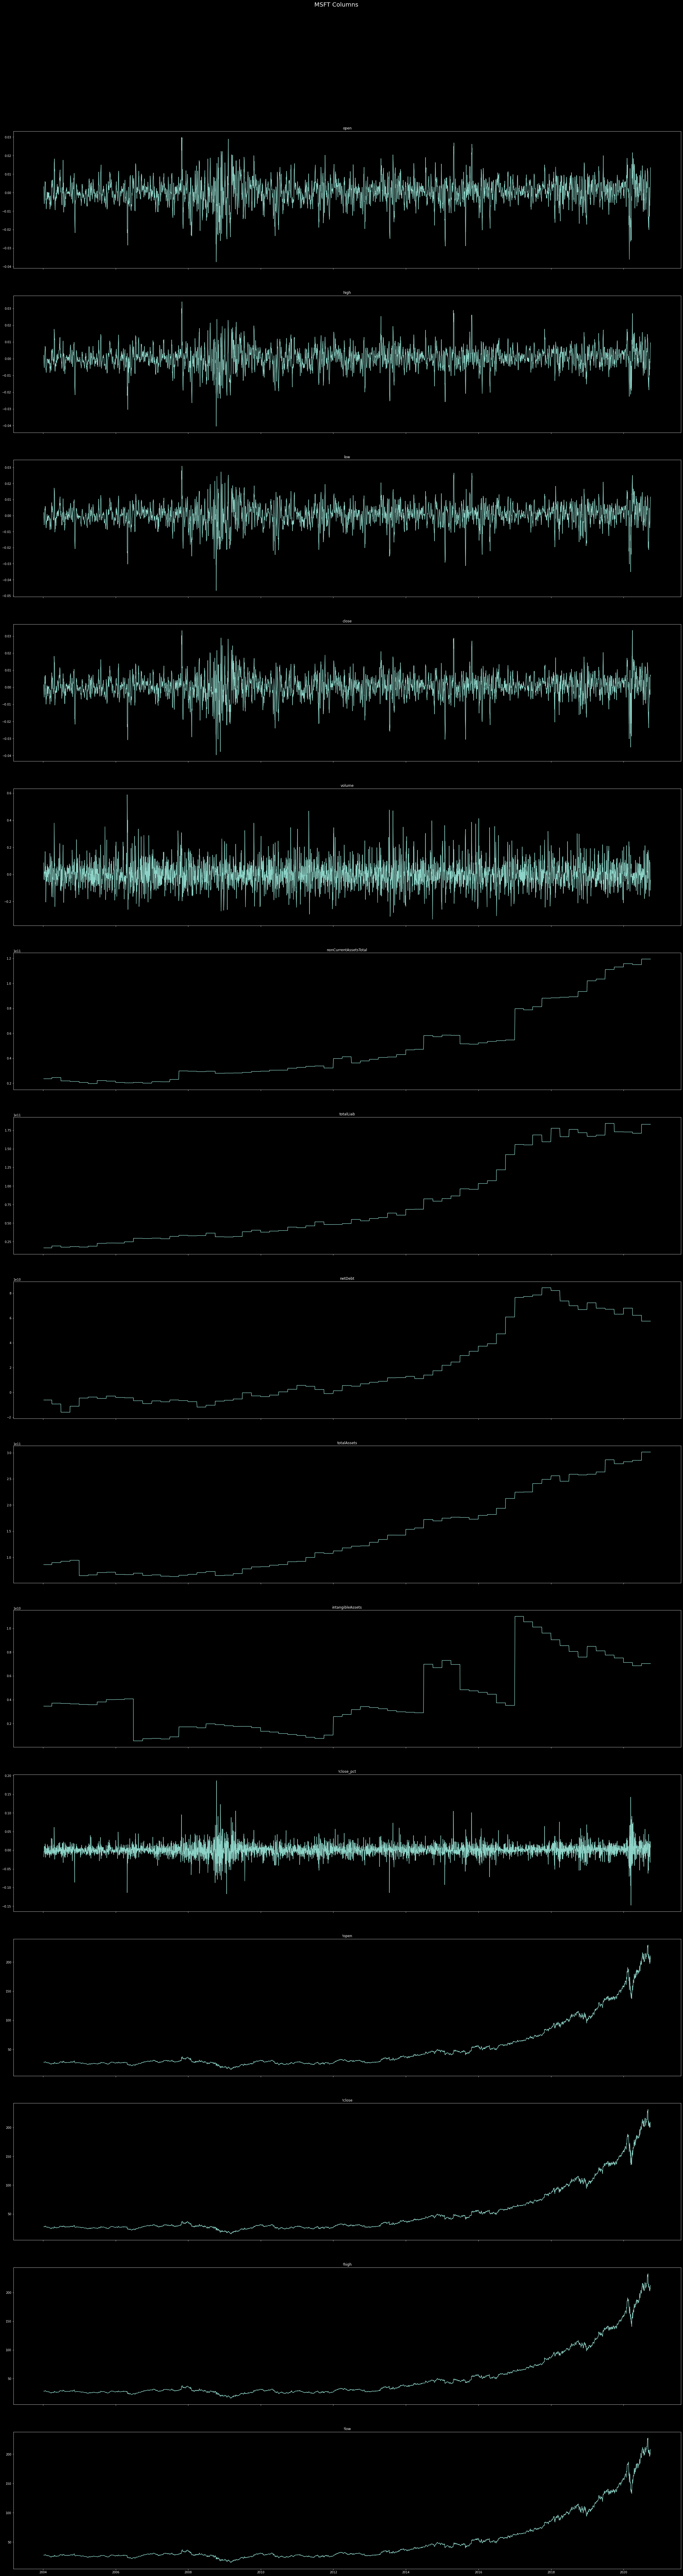

In [18]:
from utils.plot_utils import *
plot_cols(df, ticker)

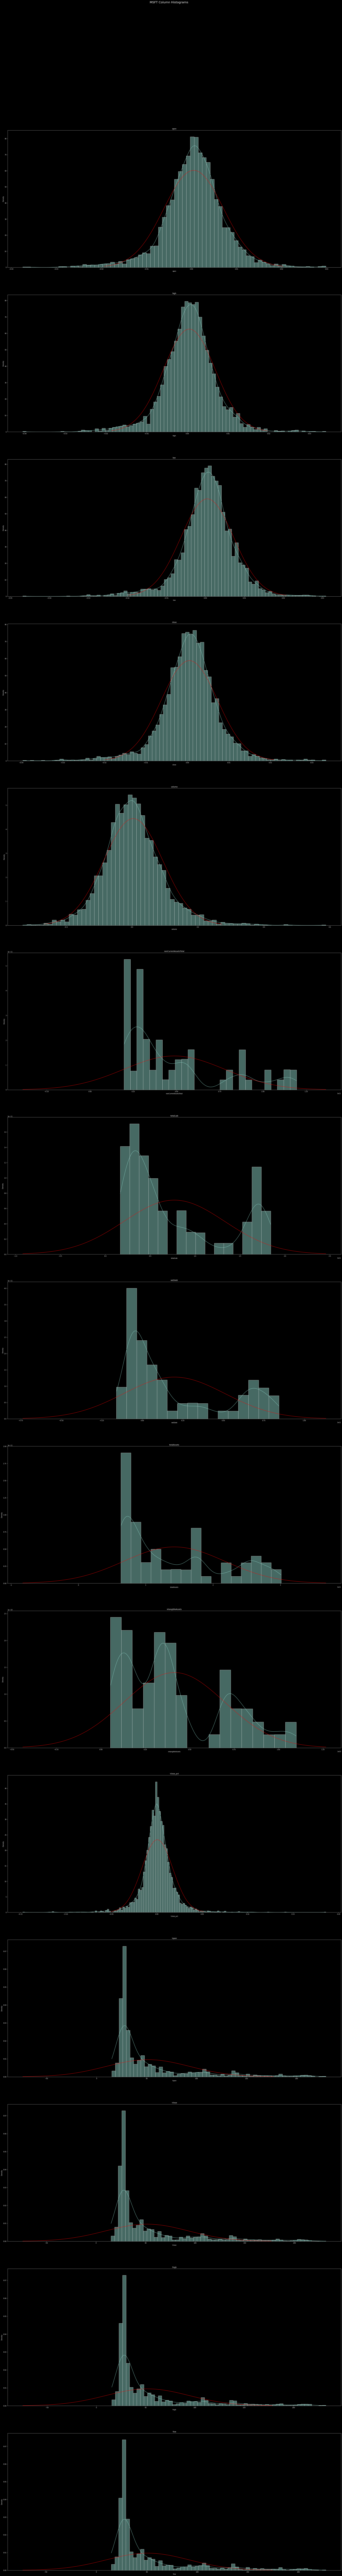

In [17]:
plot_col_histogram(df, ticker)

In [19]:
df_train = df.iloc[:int(0.8*df.shape[0]),:]
df_val = df.iloc[int(0.8*df.shape[0]):int(0.9*df.shape[0]),:]
df_test = df.iloc[int(0.9*df.shape[0]):,:]
df_train.shape

(3366, 15)

In [20]:
from utils.preprocessing_utils import *

In [21]:
df_train_norm, df_val_norm, df_test_norm, scalers = standardize_and_scale(df_train, df_val, df_test)
df_train_norm.head()

{'open': MaxAbsScaler(), 'high': MaxAbsScaler(), 'low': MaxAbsScaler(), 'close': MaxAbsScaler(), 'volume': MaxAbsScaler(), 'nonCurrentAssetsTotal': MinMaxScaler(), 'totalLiab': MinMaxScaler(), 'netDebt': MaxAbsScaler(), 'totalAssets': MinMaxScaler(), 'intangibleAssets': MinMaxScaler()}


,open,high,low,close,volume,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2004-01-09,0.086604,0.051465,0.040515,0.038473,0.145579,0.064272,0.0,-0.079552,0.140665,0.278723,-0.017756,28.030001,27.660000,28.059999,27.590000
2004-01-12,-0.011569,-0.079535,-0.057368,-0.103017,-0.062455,0.064272,0.0,-0.079552,0.140665,0.278723,-0.003254,27.670000,27.570000,27.730000,27.350000
2004-01-13,-0.122406,-0.113022,-0.124809,-0.146376,0.032125,0.064272,0.0,-0.079552,0.140665,0.278723,-0.005078,27.549999,27.430000,27.639999,27.260000
2004-01-14,-0.124425,-0.102228,-0.083059,-0.091863,-0.070737,0.064272,0.0,-0.079552,0.140665,0.278723,0.009843,27.520000,27.700001,27.730000,27.469999
2004-01-15,-0.159975,-0.133492,-0.089295,-0.112054,-0.001778,0.064272,0.0,-0.079552,0.140665,0.278723,-0.005776,27.549999,27.540001,27.719999,27.420000


(3366, 15)
(3366, 5) Index(['nonCurrentAssetsTotal', 'totalLiab', 'netDebt', 'totalAssets',
       'intangibleAssets'],
      dtype='object')
(3366, 2)
[0.89921566 0.06353823]


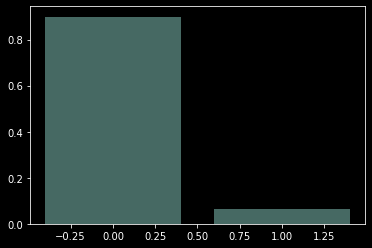

,open,high,low,close,volume,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low,fund_pca*_0,fund_pca*_1
2004-01-09,0.086604,0.051465,0.040515,0.038473,0.145579,0.064272,0.0,-0.079552,0.140665,0.278723,-0.017756,28.030001,27.660000,28.059999,27.590000,-0.365227,-0.158213
2004-01-12,-0.011569,-0.079535,-0.057368,-0.103017,-0.062455,0.064272,0.0,-0.079552,0.140665,0.278723,-0.003254,27.670000,27.570000,27.730000,27.350000,-0.365227,-0.158213
2004-01-13,-0.122406,-0.113022,-0.124809,-0.146376,0.032125,0.064272,0.0,-0.079552,0.140665,0.278723,-0.005078,27.549999,27.430000,27.639999,27.260000,-0.365227,-0.158213
2004-01-14,-0.124425,-0.102228,-0.083059,-0.091863,-0.070737,0.064272,0.0,-0.079552,0.140665,0.278723,0.009843,27.520000,27.700001,27.730000,27.469999,-0.365227,-0.158213
2004-01-15,-0.159975,-0.133492,-0.089295,-0.112054,-0.001778,0.064272,0.0,-0.079552,0.140665,0.278723,-0.005776,27.549999,27.540001,27.719999,27.420000,-0.365227,-0.158213


In [22]:
df_train_pca, df_val_pca, df_test_pca = add_PCA(fund_features, df_train_norm, df_val_norm, df_test_norm, n_components=2, prefix='fund_', append=True)
df_train_pca.head()

In [23]:
df_train_pca.columns

Index(['open', 'high', 'low', 'close', 'volume', 'nonCurrentAssetsTotal',
       'totalLiab', 'netDebt', 'totalAssets', 'intangibleAssets', '!close_pct',
       '!open', '!close', '!high', '!low', 'fund_pca*_0', 'fund_pca*_1'],
      dtype='object')

In [24]:
df_train_pca['Y_reg'] = df_train_pca['close'].shift(-1)
df_train_pca.loc[df_train_pca.index[-1], 'Y_reg'] = df_val_pca.loc[df_val_pca.index[0], 'close']

df_val_pca['Y_reg'] = df_val_pca['close'].shift(-1)
df_val_pca.loc[df_val_pca.index[-1], 'Y_reg'] = df_test_pca.loc[df_test_pca.index[0], 'close']

df_test_pca['Y_reg'] = df_test_pca['close'].shift(-1)
df_test_pca.dropna(inplace=True)

In [25]:
df_test_pca.isna().sum()

open                     0
high                     0
low                      0
close                    0
volume                   0
nonCurrentAssetsTotal    0
totalLiab                0
netDebt                  0
totalAssets              0
intangibleAssets         0
!close_pct               0
!open                    0
!close                   0
!high                    0
!low                     0
fund_pca*_0              0
fund_pca*_1              0
Y_reg                    0
dtype: int64

In [27]:
import pickle

df_train_pca.to_csv(f'data/processed/fund/{ticker}_fund_train.csv')
df_val_pca.to_csv(f'data/processed/fund/{ticker}_fund_val.csv')
df_test_pca.to_csv(f'data/processed/fund/{ticker}_fund_test.csv')
with open(f'data/processed/fund/{ticker}_scalers.pickle', mode='wb',) as f: pickle.dump(scalers, f, protocol=pickle.HIGHEST_PROTOCOL)